# Assignment 1:

**Importing general libraries**

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# lot of deprecated warnings while plotting.
# code took from https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython
import warnings
warnings.filterwarnings('ignore')

**Reading csv file into dataframe**

In [72]:
haberman = pd.read_csv('haberman.csv')

**Seeing basic info about the data**

In [73]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [74]:
haberman.shape

(306, 4)

In [75]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


From above info we can see that there are no null values. all rows have 306 non-null values which is equal to total number of rows

In [76]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

From above cell output we see that this data does not have equal rows for class label. i.e. the patients who couldn't survive for 5 years are less compared to patients who survived longer. this is non-uniform dataset.

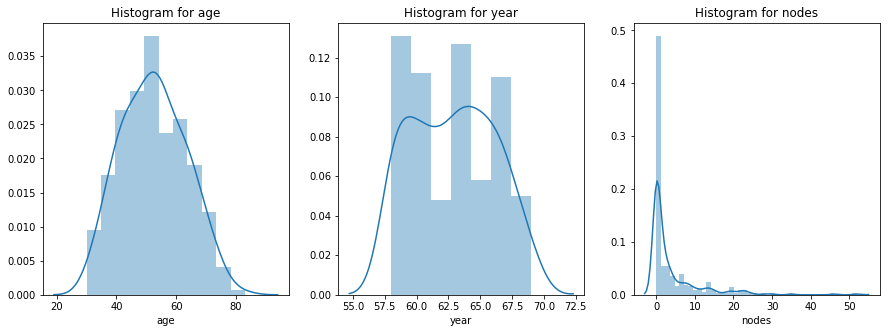

In [77]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.distplot(haberman['age'])
plt.title('Histogram for age')
plt.subplot(132)
sns.distplot(haberman['year'])
plt.title('Histogram for year')
plt.subplot(133)
sns.distplot(haberman['nodes'])
plt.title('Histogram for nodes')
plt.show()

From above figures we see that year and nodes are not normally distributed. age seems to be normally distributed. And nodes distribution is highly skewed. So let us see its mean, median and standard deviation.

In [78]:
print("mean of nodes: ", haberman['nodes'].mean())
print("median of nodes: ", haberman['nodes'].median())
print("standard deviation of nodes: ", haberman['nodes'].std())

mean of nodes:  4.026143790849673
median of nodes:  1.0
standard deviation of nodes:  7.189653506248565


Let us plot nodes vs survival status to see effect of extreme points on survival status.

In [79]:
haberman_status1 = haberman[haberman['status']==1]
haberman_status2 = haberman[haberman['status']==2]

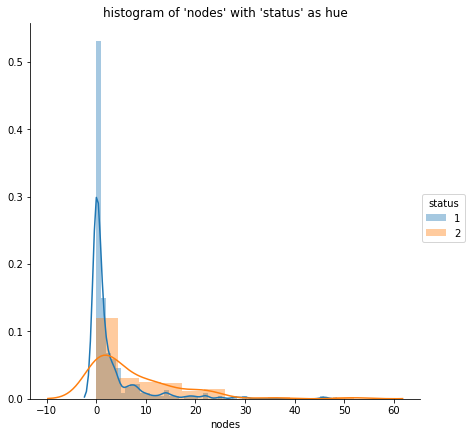

In [80]:
sns.FacetGrid(haberman, hue='status', size=6).map(sns.distplot, 'nodes').add_legend()
plt.title("histogram of 'nodes' with 'status' as hue")
plt.show()

The above plot may not give any information as there is no clear seperation between the 2 plots. they overlap a lot. it seems extreme points doesnt have that much effect on either of survival status. Let us do this for other 2 columns.

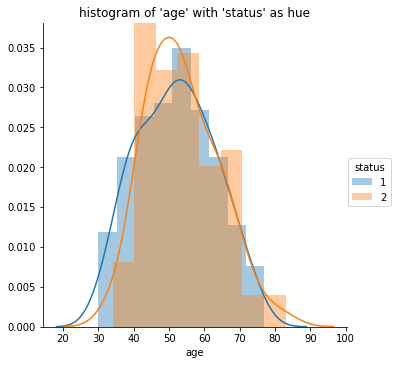

In [81]:
sns.FacetGrid(haberman, hue='status', size=5).map(sns.distplot, 'age').add_legend()
plt.title("histogram of 'age' with 'status' as hue")
plt.show()

The age column also does not give any seperation.

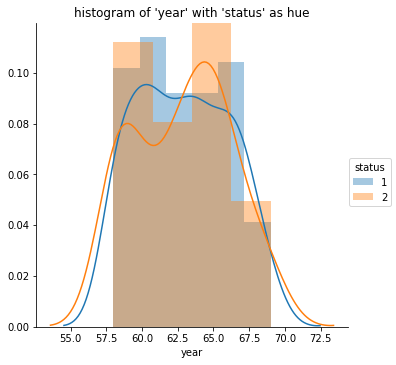

In [82]:
sns.FacetGrid(haberman, hue='status', size=5).map(sns.distplot, 'year').add_legend()
plt.title("histogram of 'year' with 'status' as hue")
plt.show()

As expected year also does not effect the status as year has nothing to with how many survived.
Now let us plot pairplot to see if there is any dependece between columns of the data

In [83]:
haberman_feats = haberman[haberman.columns[:-1]]
haberman_label = haberman['status']

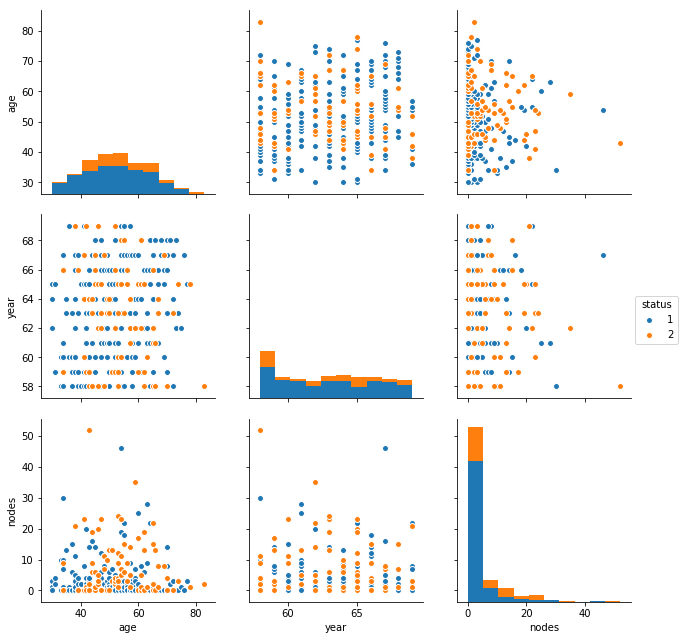

In [84]:
sns.pairplot(haberman, hue='status', vars=haberman.columns[:-1], size=3)
plt.show()

There is no clear seperation between columns either. And the nodes data seem to be following lognormal distribtion. To see if it truly is, let us try converting it to normal and do futher EDA.

In [85]:
import math

Before applying log we add small value to nodes as there are lot of 0's in nodes column

In [86]:
print("number of zeros in nodes column:", len(haberman[haberman['nodes']==0]))

number of zeros in nodes column: 136


In [87]:
haberman['log_nodes'] = list(map(math.log, haberman['nodes']+0.001))

In [88]:
haberman.head()

,age,year,nodes,status,log_nodes
0,30,64,1,1,0.001000
1,30,62,3,1,1.098946
2,30,65,0,1,-6.907755
3,31,59,2,1,0.693647
4,31,65,4,1,1.386544


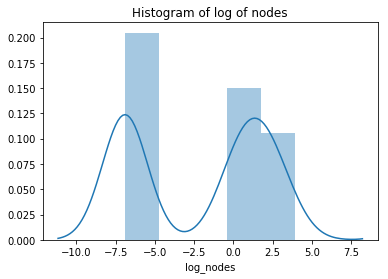

In [91]:
sns.distplot(haberman['log_nodes'])
plt.title('Histogram of log of nodes')
plt.show()

Clearly it is not following normal distribution but it follows some distribution with 2 peaks. let us again plot 'log_nodes' vs 'status' this time.

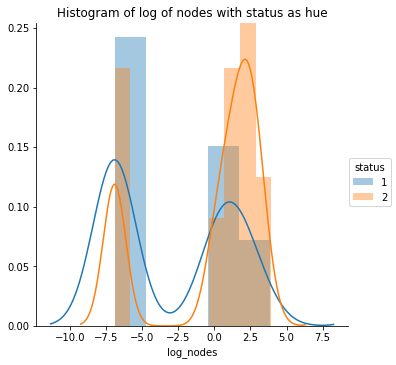

In [92]:
sns.FacetGrid(haberman, hue='status', size=5).map(sns.distplot, 'log_nodes').add_legend()
plt.title('Histogram of log of nodes with status as hue')
plt.show()

Sadly, even this plot doesnt give any seperation indicating log_nodes doesnt tell about survival status. I guess the left peak is indicating all zeros (and ones) in the nodes

Finally, Let us plot box plots to see outliers and get a idea of range and quartiles of different columns in the data

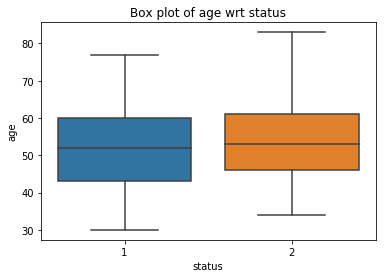

In [94]:
sns.boxplot(x='status', y='age', data=haberman)
plt.title('Box plot of age wrt status')
plt.show()

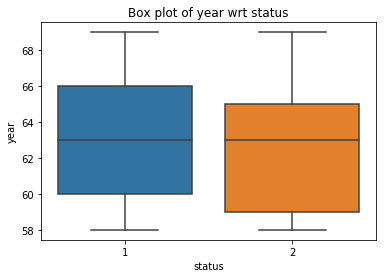

In [95]:
sns.boxplot(x='status', y='year', data=haberman)
plt.title('Box plot of year wrt status')
plt.show()

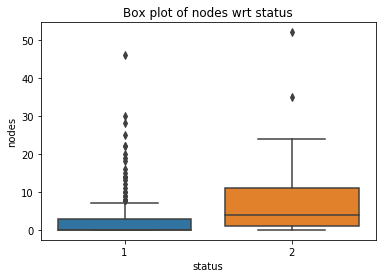

In [96]:
sns.boxplot(x='status', y='nodes', data=haberman)
plt.title('Box plot of nodes wrt status')
plt.show()

The nodes have lot of outliers in the data. These outliers may be important as these are not human errors and they are number of auxillary nodes detected in a person. we see lot of extreme points in survival status 1.